# Explore here

## Predicting the cost of health insurance for a person

The important insurance company 4Geeks Insurance S.L. wants to calculate, based on the physiological data of its customers what will be the premium (cost) to be borne by each of them. To do this, it has assembled a whole team of doctors, and based on data from other companies and a particular study, it has managed to gather a set of data to train a predictive model.

In [465]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [466]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

Para este dataset, se cuenta con 1338 registros cuya información se reparte en 7 columnas, de las cuales:
- 4 son numéricas y 3 categóricas.
- No se reflejan valores nulos en este punto
- La variable objetivo es charges

In [467]:
data.drop_duplicates
data.shape

(1338, 7)

## Analysis of univariate variables

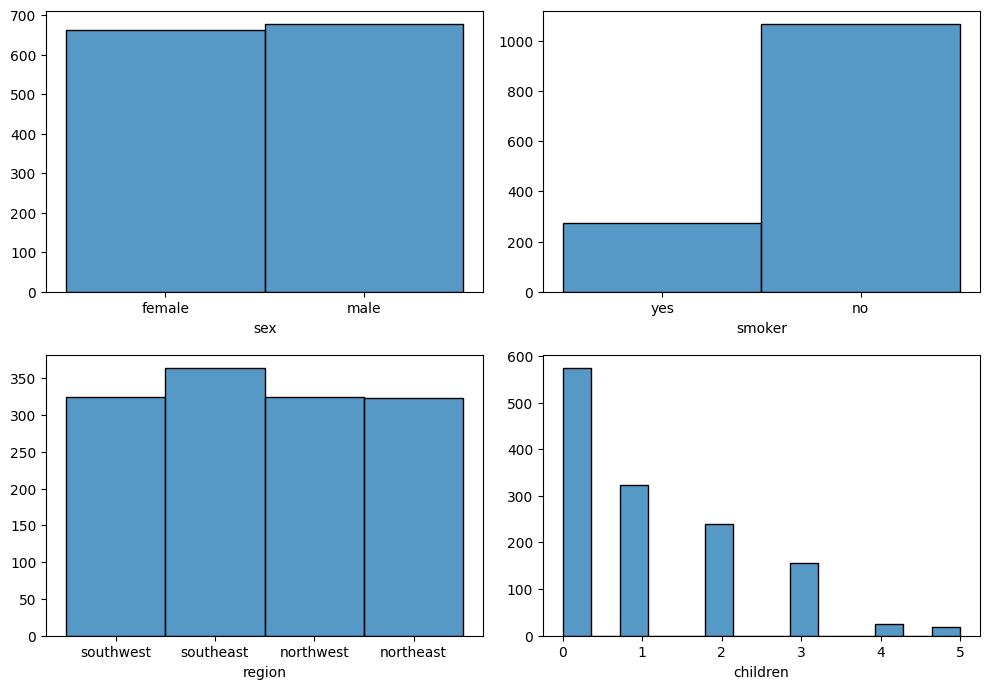

In [468]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,2, figsize = (10, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0,0], data = data, x = "sex").set(ylabel = None)
sns.histplot(ax = axis[0,1], data = data, x = "smoker").set(ylabel = None)
sns.histplot(ax = axis[1,0], data = data, x = "region").set(ylabel = None)
sns.histplot(ax = axis[1,1], data = data, x = "children").set(ylabel = None)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

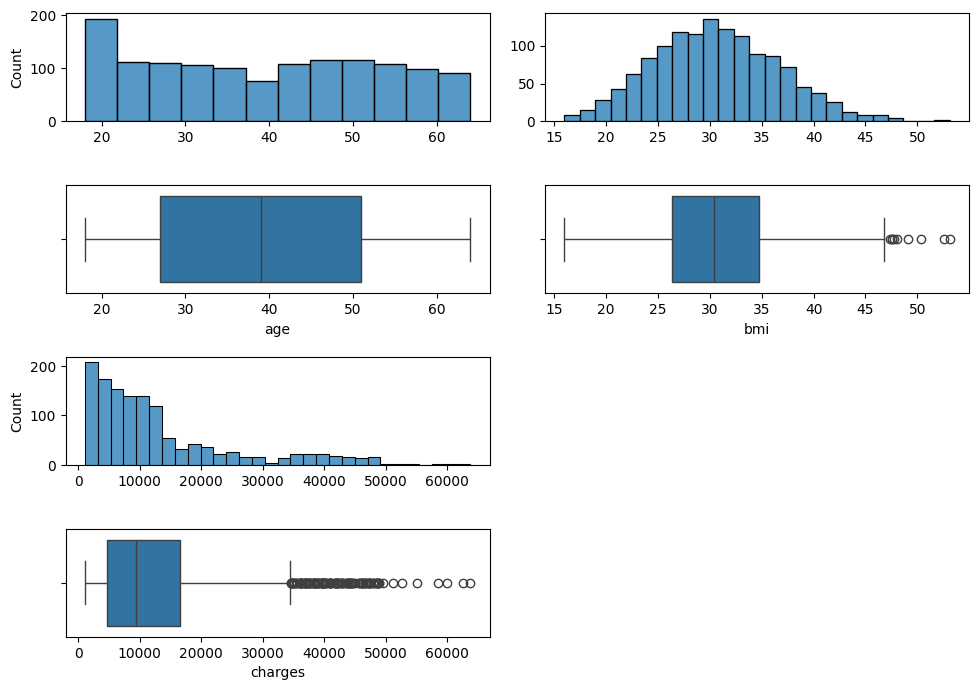

In [469]:
fig, axis = plt.subplots(4,2, figsize = (10, 7))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "age")
sns.histplot(ax = axis[0, 1], data = data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "bmi")
sns.histplot(ax = axis[2, 0], data = data, x = "charges").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = data, x = "charges")

# Ajustar el layout
plt.tight_layout()
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Mostrar el plot
plt.show()

In [470]:
data["sex"] = pd.factorize(data["sex"])[0]
data["smoker"] = pd.factorize(data["smoker"])[0]
data["region"] = pd.factorize(data["region"])[0]

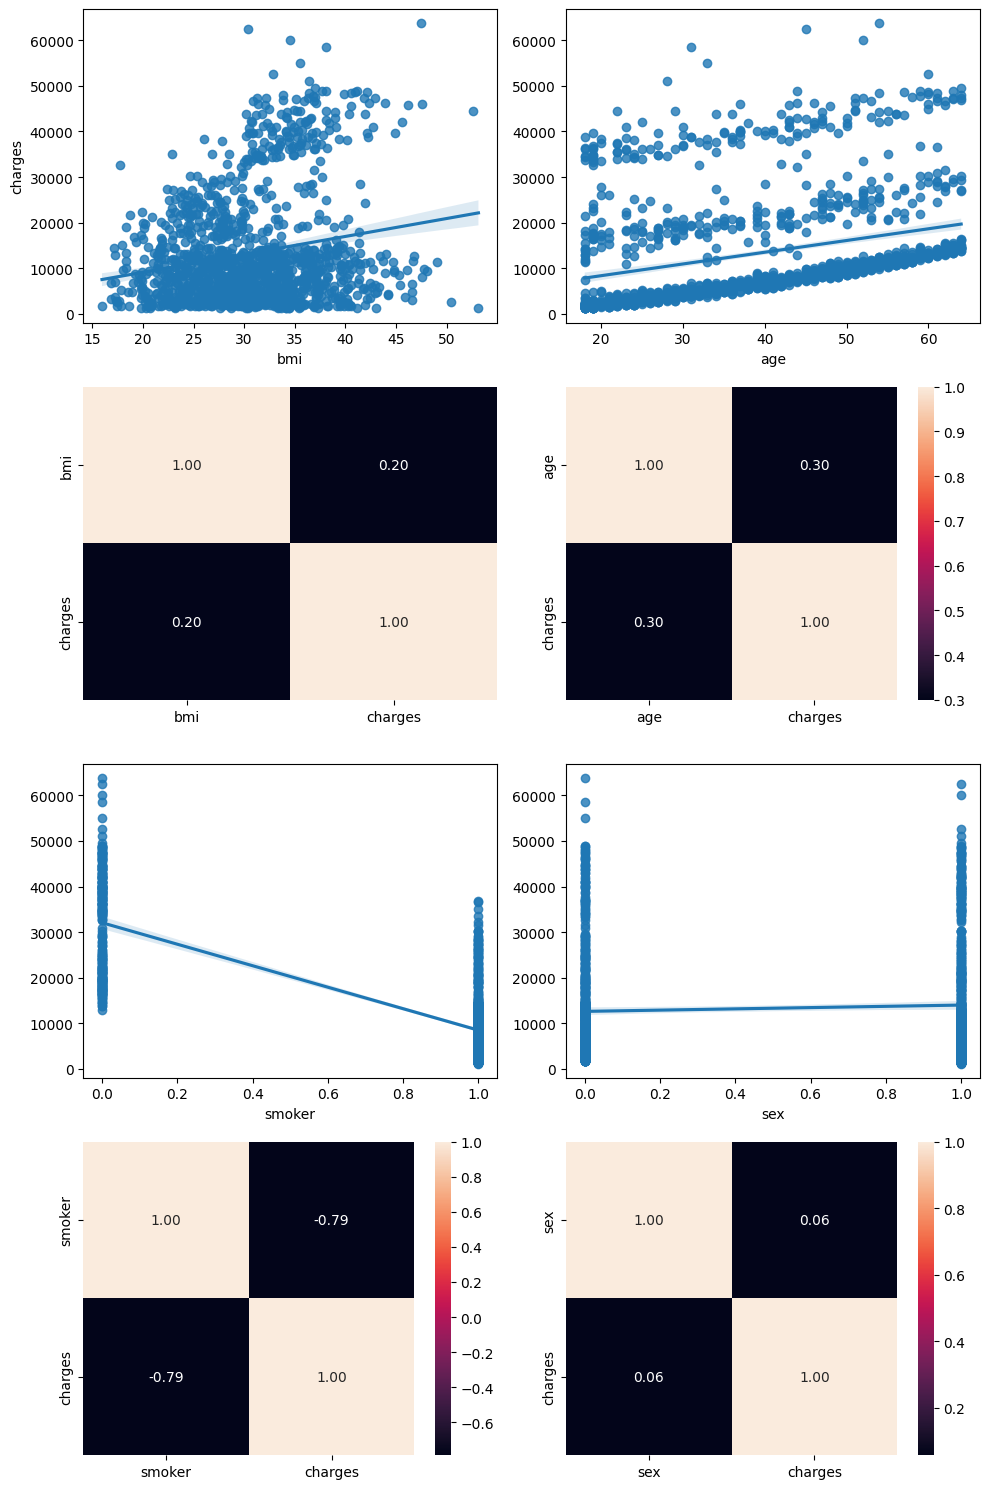

In [471]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data, x = "bmi", y = "charges")
sns.heatmap(data[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data, x = "age", y = "charges").set(ylabel=None)
sns.heatmap(data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = data, x = "smoker", y = "charges").set(ylabel=None)
sns.heatmap(data[["smoker", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])
sns.regplot(ax = axis[2, 1], data = data, x = "sex", y = "charges").set(ylabel=None)
sns.heatmap(data[["sex", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Como se observa en los gráficos, factores como el bmi, la edad y si es fumador o no tienen un impacto en cuanto al cargo a pagar. En el caso del sexo, la correlación arrojada es débil para considerarse como impacto.

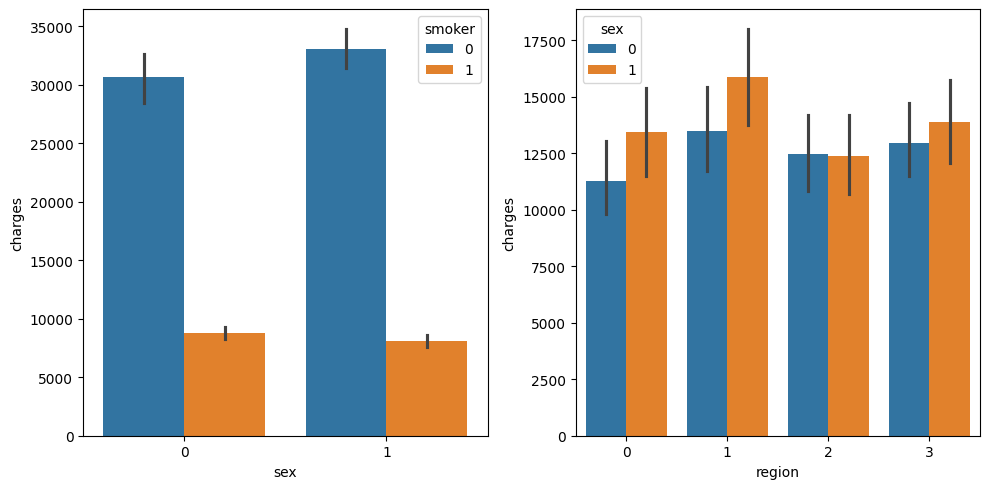

In [472]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = data, x = "sex", y = "charges", hue = "smoker")
sns.barplot(ax = axis[1], data = data, x = "region", y = "charges", hue = "sex")

plt.tight_layout()

plt.show()

Este gráfico nos confirma que el sexo no tiene tanta importancia en el costo, sino que el ser fumador o no es lo que altera el precio.

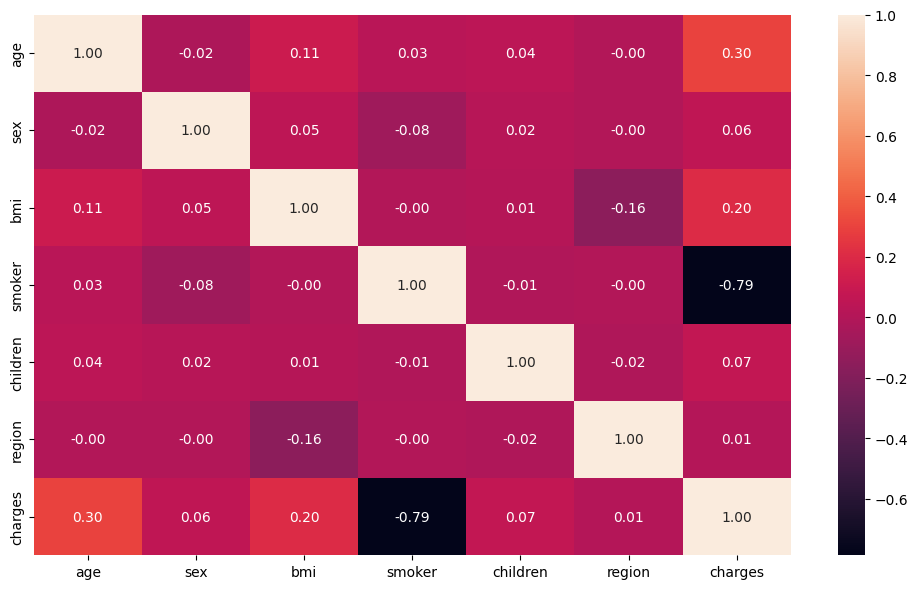

In [473]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(data[["age", "sex", "bmi", "smoker","children", "region","charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Tal como se sospechaba anteriormente,.el sexo y la región no tienen gran influencia en cuanto al costo a pagar, siendo región la variable con menor correlación con la variable objetivo.
La variable predominante sería smoker, con un total de -0.79, indicando que la relación entre el precio y si la persona es fumadora o no es bastante fuerte.
Se decide descartar la variable región debido a que la correlación es muy baja.

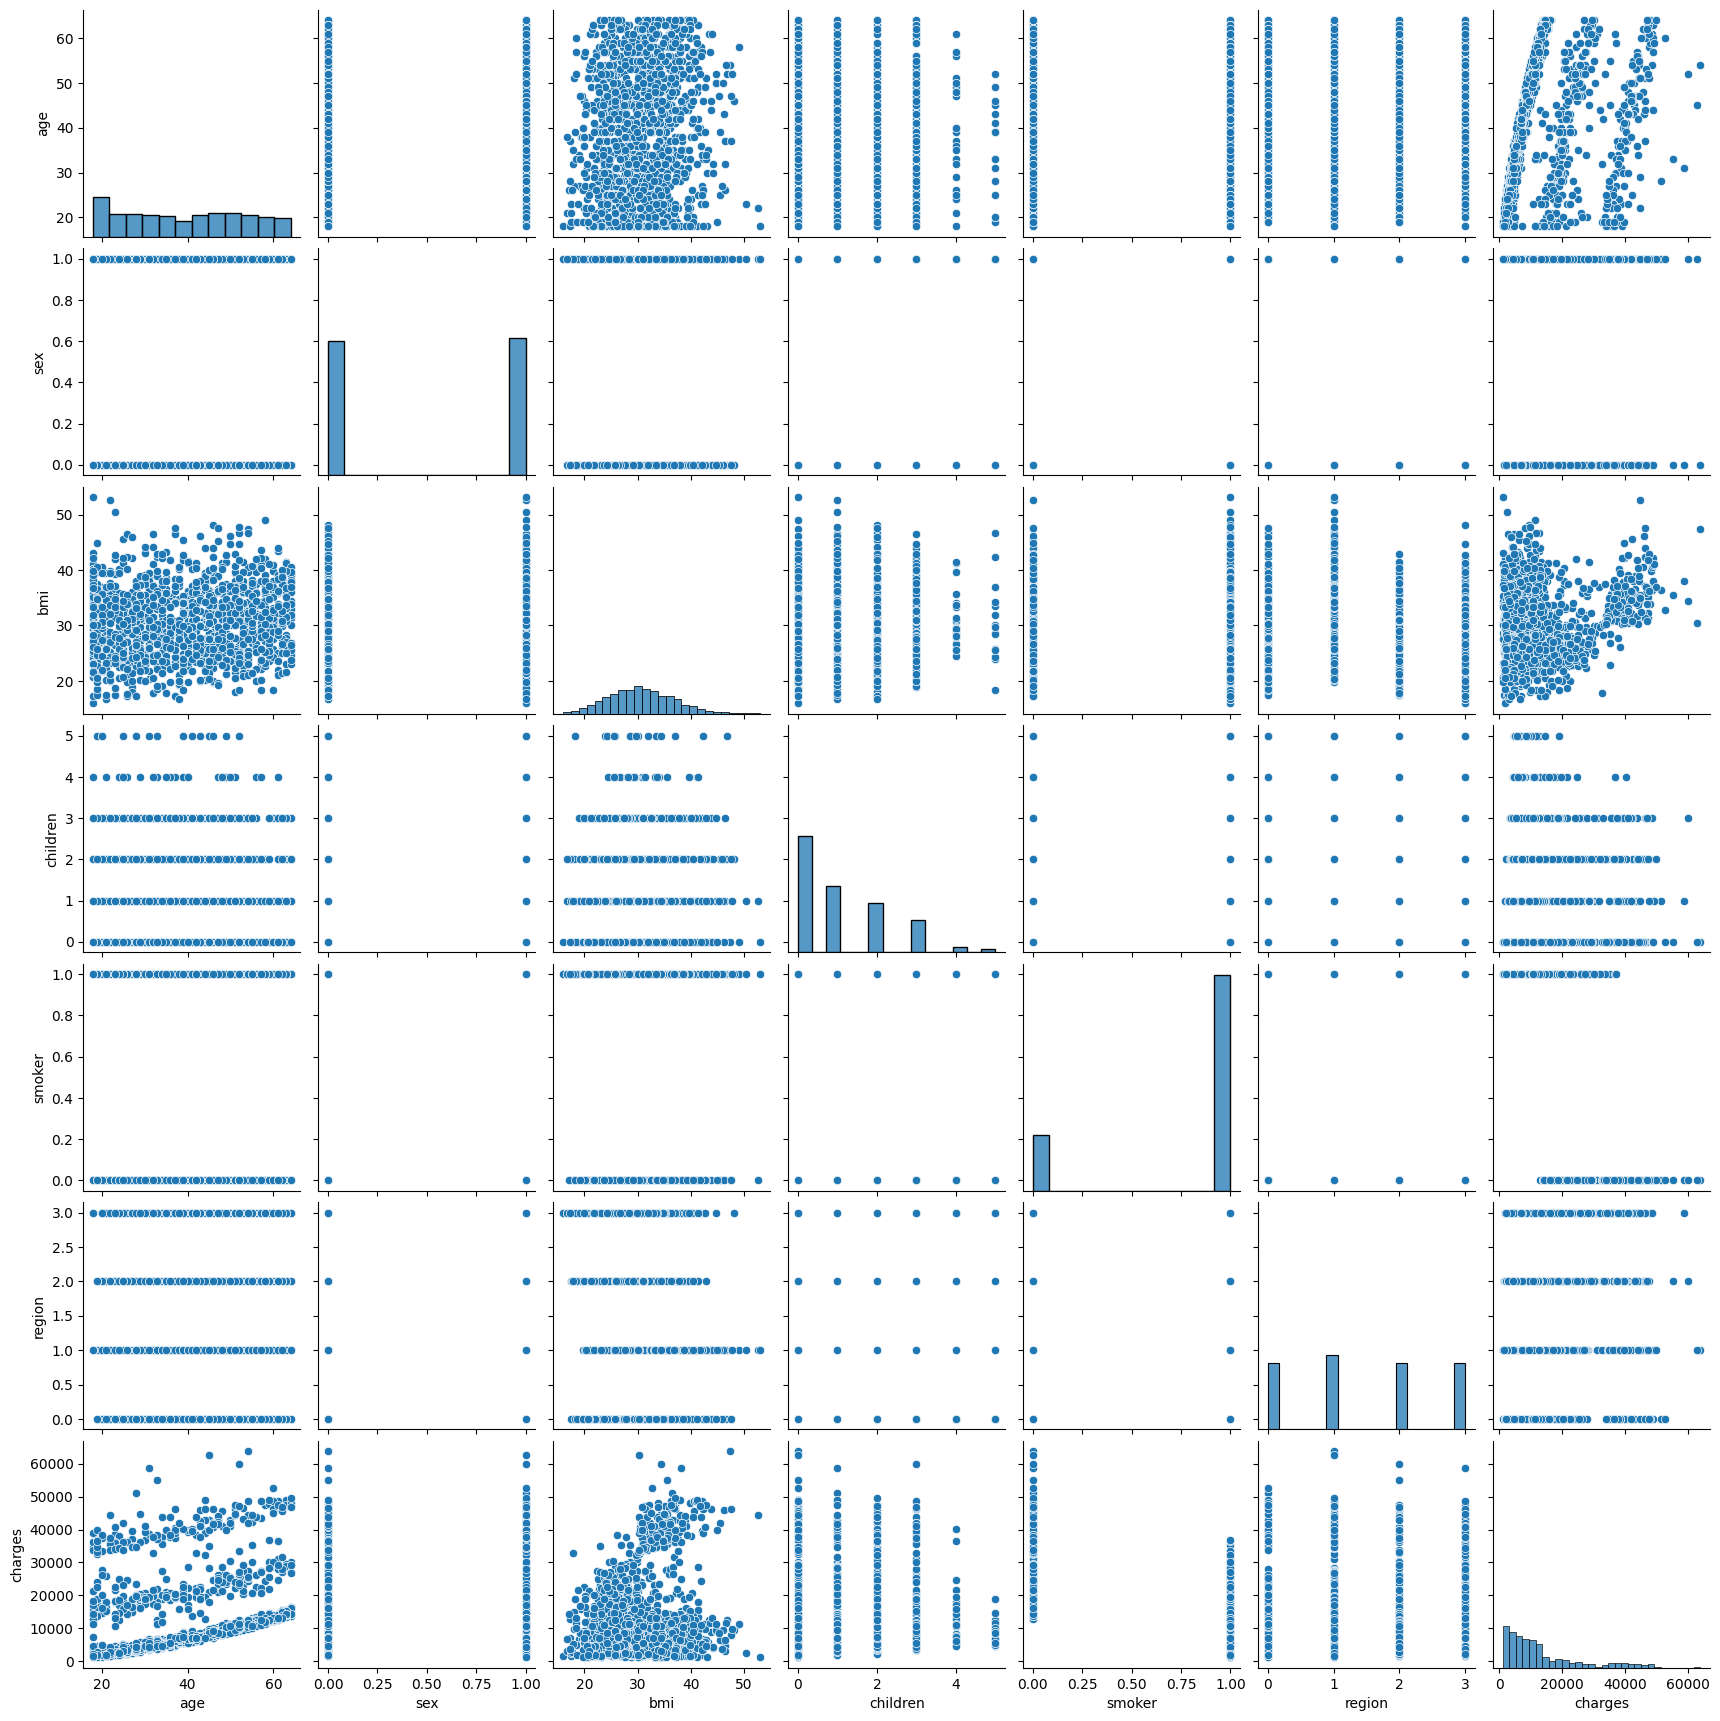

In [474]:
sns.pairplot(data = data)

In [475]:
data.describe()


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


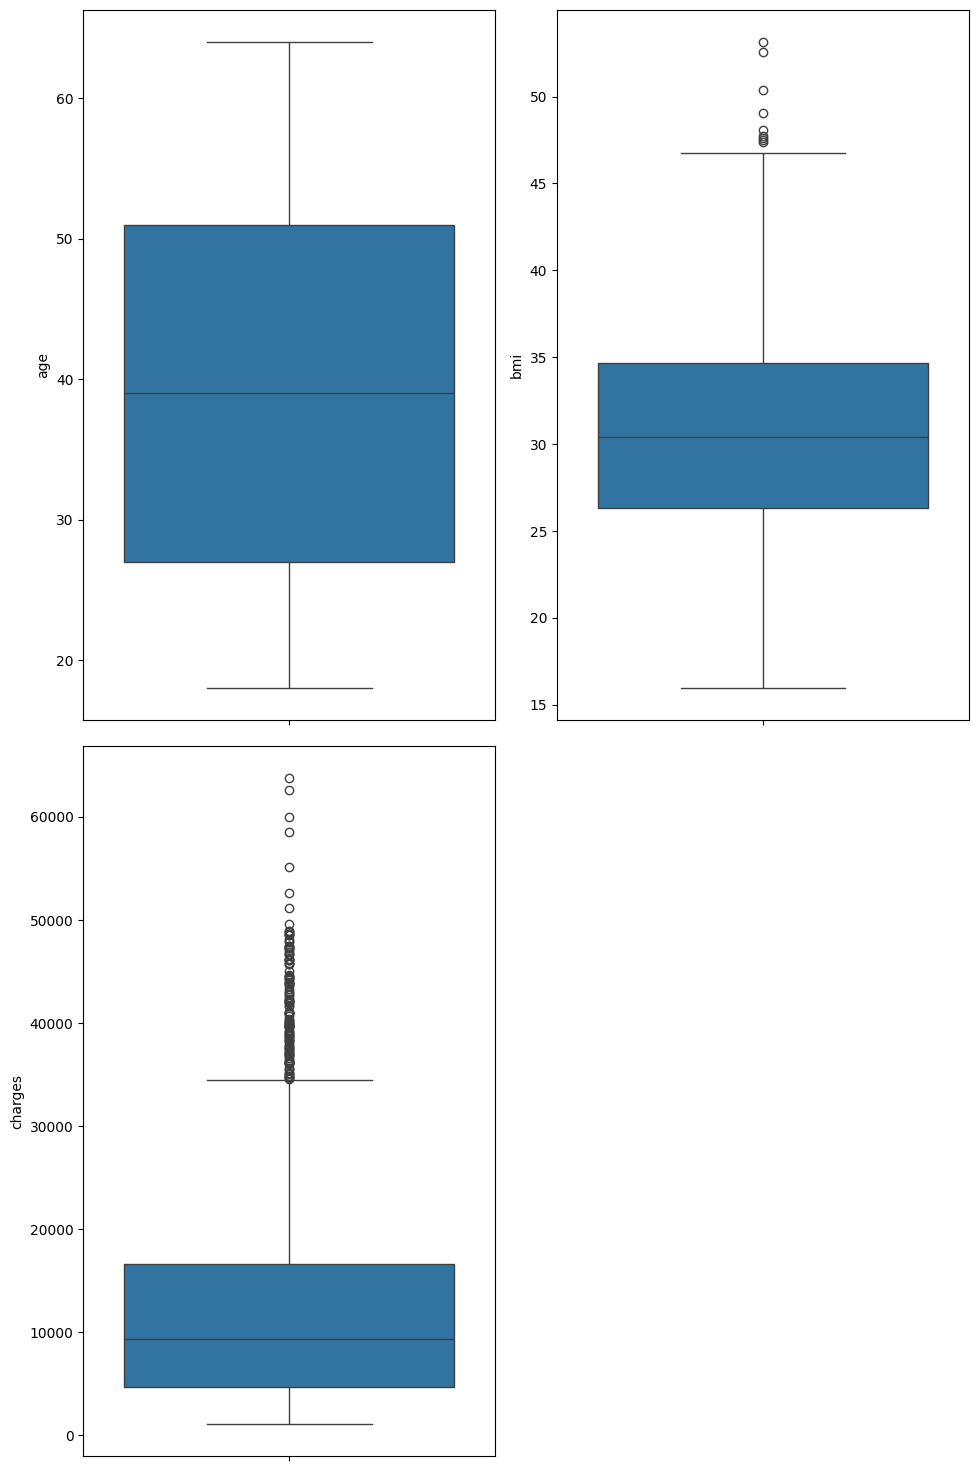

In [476]:
fig, axis = plt.subplots(2,2, figsize = (10, 15))

sns.boxplot(ax = axis[0,0], data = data, y = "age")
sns.boxplot(ax = axis[0,1], data = data, y = "bmi")
sns.boxplot(ax = axis[1,0], data = data, y = "charges")

plt.tight_layout()
fig.delaxes(axis[1, 1])
plt.show()

En estos gráficos se puede observar que la edad está muy bien distribuida, no existiendo valores fuera de rango.
En cuanto al bmi y a los cargos, deberá realizarse el procesamiento de outliers para determinar si existen registros que puedan afectar los resultados del modelo.

In [477]:
age_stats = data["age"].describe()
age_stats

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [478]:
age_iqr = age_stats["75%"] - age_stats["25%"]
upper_limit = age_stats["75%"] + 1.5 * age_iqr
lower_limit = age_stats["25%"] - 1.5 * age_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(age_iqr, 2)}")

The upper and lower limits for finding outliers are 87.0 and -9.0, with an interquartile range of 24.0


In [479]:
data[data["age"] > 87]

,age,sex,bmi,children,smoker,region,charges


In [480]:
data[data["age"] < -9]

,age,sex,bmi,children,smoker,region,charges


In [481]:
bmi_stats = data["bmi"].describe()
bmi_stats

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [482]:
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")

The upper and lower limits for finding outliers are 47.29 and 13.7, with an interquartile range of 8.4


In [483]:
data[data["bmi"] > 47.29]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,1,1,11381.32540
286,46,0,48.07,2,1,3,9432.92530
401,47,1,47.52,1,1,1,8083.91980
543,54,0,47.41,0,0,1,63770.42801
847,23,1,50.38,1,1,1,2438.05520
860,37,0,47.60,2,0,0,46113.51100
1047,22,1,52.58,1,0,1,44501.39820
1088,52,1,47.74,1,1,1,9748.91060
1317,18,1,53.13,0,1,1,1163.46270


In [484]:
data[data["bmi"] > 56.3]

,age,sex,bmi,children,smoker,region,charges


In [485]:
data[data["bmi"] < 8.4]

,age,sex,bmi,children,smoker,region,charges


In [486]:
charges_stats = data["charges"].describe()
charges_stats

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [487]:
charges_iqr = charges_stats["75%"] - charges_stats["25%"]
upper_limit = charges_stats["75%"] + 1.5 * charges_iqr
lower_limit = charges_stats["25%"] - 1.5 * charges_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(charges_iqr, 2)}")

The upper and lower limits for finding outliers are 34489.35 and -13109.15, with an interquartile range of 11899.63


In [488]:
data[data["age"] > 34489.35]

,age,sex,bmi,children,smoker,region,charges


In [489]:
data[data["bmi"] < -13109.15]

,age,sex,bmi,children,smoker,region,charges


Después de revisar los resultados, se determinó no eliminar los registros de ninguna de las variables, ya que al no ser tan extremos, no se considera afecten negativamente el modelo.
En el caso de bmi específicamente, los valores fuera del rango están en el siguiente intercuartil, así que por eso se toma la decisión de conservarlos.

Para realizar el modelado, se decidió eliminar las variables sex y region, debido a que presentan los menores coeficientes de correlación y se considera que la relación es muy baja, lo que podría afectar el modelo.

In [490]:
data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [491]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

num_variables = ["age", "bmi", "children", "smoker","charges"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(data[num_variables])
data_norm = pd.DataFrame(norm_features, index = data.index, columns = num_variables)
data_norm.head()
scaler.fit(data)


X = data_norm.drop("charges", axis = 1)
y = data_norm["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [493]:
X_train["charges"] = list(y_train)
X_test["charges"] = list(y_test)

X_train.to_csv("/workspaces/regresionLineal/data/processed/data_train.csv", index=False)
X_test.to_csv("/workspaces/regresionLineal/data/processed/data_test.csv", index=False)

### Regresión Lineal

In [494]:
train_data = pd.read_csv("../data/processed/data_train.csv")
test_data = pd.read_csv("../data/processed/data_test.csv")
train_data.head()

,age,bmi,children,smoker,charges
0,0.483668,-1.757474,0.751079,0.507463,-0.336755
1,0.554869,-1.040599,-0.908614,0.507463,-0.391207
2,0.910875,-0.952015,-0.908614,0.507463,1.143909
3,-0.014740,0.599846,3.240619,0.507463,-0.386072
4,1.053277,-1.508126,1.580926,0.507463,-0.065679


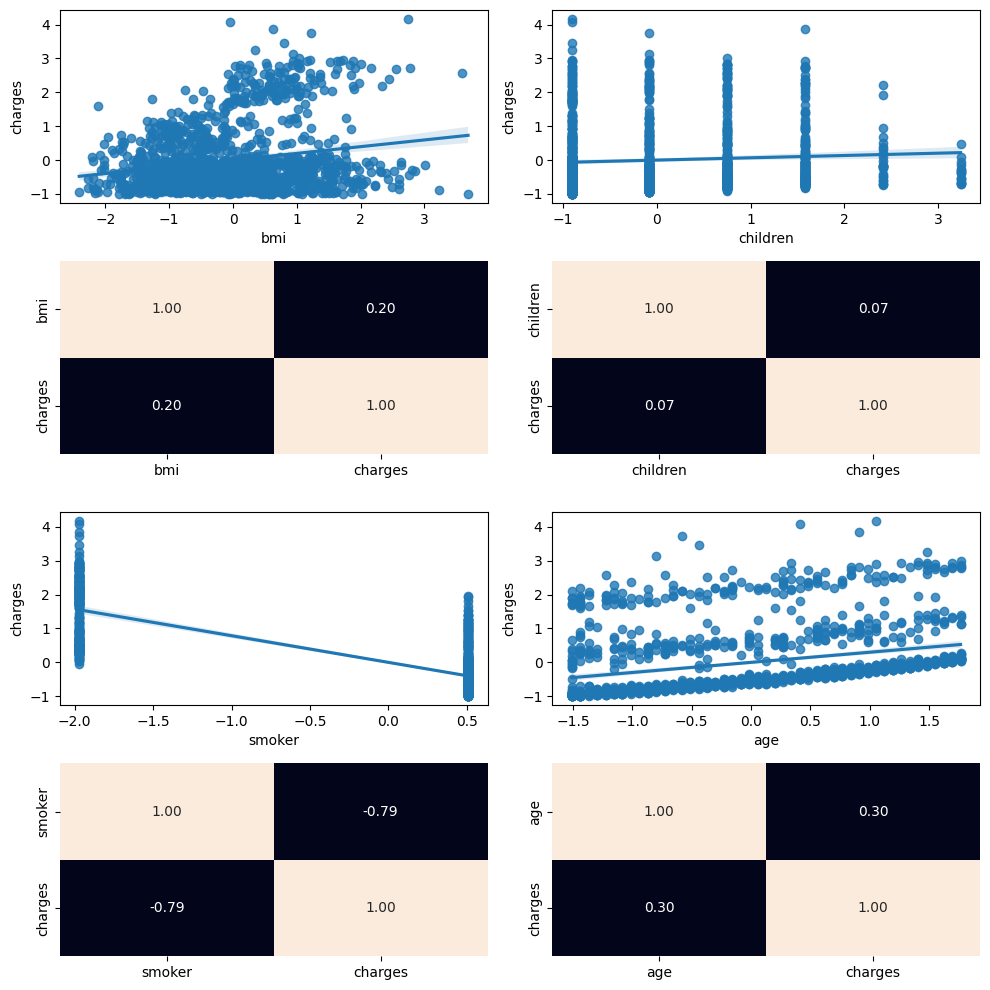

In [501]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 10))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0,0], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)
sns.regplot(ax = axis[0,1], data = total_data, x = "children", y = "charges")
sns.heatmap(total_data[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1], cbar = False)
sns.regplot(ax = axis[2,0], data = total_data, x = "smoker", y = "charges")
sns.heatmap(total_data[["smoker", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3,0], cbar = False)
sns.regplot(ax = axis[2,1], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[3,1], cbar = False)

plt.tight_layout()

plt.show()

In [496]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [497]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [498]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2, b3): {model.coef_}")

Intercep (a): 0.0037986999754635225
Coefficients (b1, b2, b3): [ 0.29825237  0.16492918  0.04252568 -0.78849312]


In [499]:
y_pred = model.predict(X_test)
y_pred

array([-0.38986567, -0.52048359,  1.94322775, -0.3179182 ,  1.12383673,
       -0.17918796, -1.08454749,  0.28745665, -1.03479032, -0.17453133,
        1.25984223, -0.32830264, -0.64547923,  2.08526721,  2.23801111,
        1.97895334,  0.16868843,  1.88116484, -0.32613434,  1.49727335,
       -0.74321084, -0.23144879, -0.87121312, -0.55304629, -0.16871717,
       -0.06626874,  0.12662165, -0.59545637, -0.30883942, -0.89948353,
       -0.31386087, -0.02569361, -0.7078022 , -0.81448089, -0.69809416,
       -0.06462004, -0.90167437, -0.33978902,  1.64914794,  1.60887999,
       -0.74346449, -0.74651263,  0.09590675, -0.15543143, -0.3585825 ,
       -0.06494797, -0.67077172, -0.80296812,  1.84894394, -0.32962725,
        0.22279629, -0.88502665, -0.09181488, -1.00811226,  0.02355062,
       -0.09605462, -0.77127322,  1.55136481,  0.03003836, -0.0720829 ,
        0.10104554, -0.22288961,  0.28078265, -0.45871403, -0.15757616,
       -0.76560382,  1.13918114, -0.17278116, -0.92184216, -0.56

In [500]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 0.23188898888225862
Coefficient of determination: 0.7811147722517886


Optimización del modelo:
This type of model cannot be optimized due to the absence of hyperparameters.

## Conclusiones:
Considerando R2, el coeficiente de determinación es bajo para que el modelo se considere aceptable. Dado que no hay forma de optimizar debido a la ausencia de parámetros, es necesario realizar un modelo diferente